<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2026-01-01 22:41:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  18.0MB/s    in 9.9s    

2026-01-01 22:41:39 (15.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

def to_num(s):
    return pd.to_numeric(s, errors="coerce")

def parse_age_mid(age):
    if pd.isna(age): return np.nan
    s = str(age)
    m = pd.Series([s]).str.extract(r"(\d+)\s*-\s*(\d+)").astype(float)
    if not m.isna().all(axis=None):
        return float(m.mean(axis=1).iloc[0])
    if "Under" in s: return 16.0
    if "or older" in s: return 70.0
    return np.nan

def map_sopartfreq(x):
    if pd.isna(x): return np.nan
    s = str(x).lower()
    if "daily" in s: return "Daily"
    if "few times per week" in s or "weekly" in s: return "Weekly"
    if "few times per month" in s or "monthly" in s: return "Monthly"
    if "few times per year" in s or "year" in s: return "Yearly"
    if "never" in s: return "Never"
    return np.nan

dfc = df.copy()

# Standard cleaned fields
dfc["AgeNum"] = dfc["Age"].apply(parse_age_mid)
dfc["JobSat_num"] = to_num(dfc["JobSat"])
dfc["SOPartFreq_clean"] = dfc["SOPartFreq"].apply(map_sopartfreq)

print("Cleaned shape:", dfc.shape)
print(dfc[["AgeNum","JobSat_num","SOPartFreq_clean"]].notna().sum())


Cleaned shape: (65437, 117)
AgeNum              65115
JobSat_num          29126
SOPartFreq_clean    44796
dtype: int64


In [8]:
def verify_cols(d, cols, label=""):
    print(f"\n--- VERIFY {label} ---")
    print("Non-null counts:")
    print(d[cols].notna().sum())
    d2 = d.dropna(subset=cols)
    print("Rows after dropna:", len(d2))
    return d2


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.




--- VERIFY Task 1.1 - DatabaseWantToWorkWith ---
Non-null counts:
DatabaseWantToWorkWith    42558
dtype: int64
Rows after dropna: 42558
Top 5 databases (counts):
DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


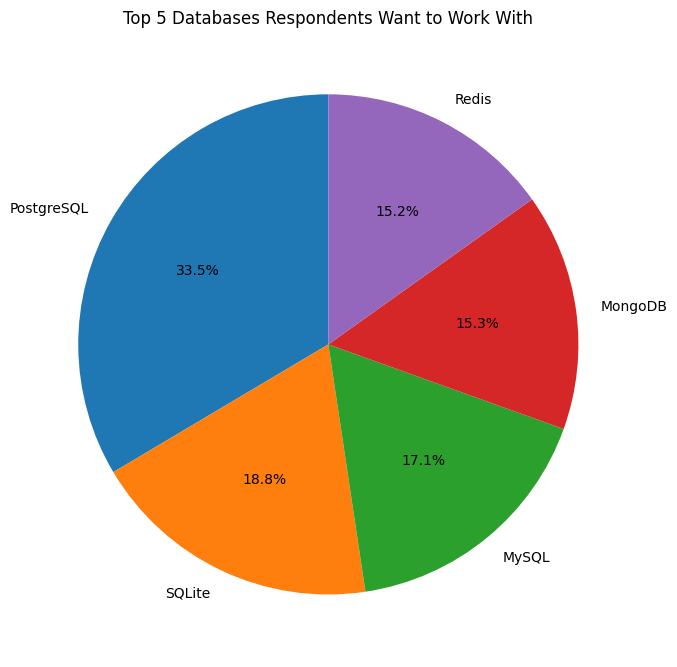

In [9]:
# Task 1.1: Top 5 Databases (Want to work with) - Pie Chart

# 1) Verify column exists + non-empty
d = verify_cols(dfc, ["DatabaseWantToWorkWith"], "Task 1.1 - DatabaseWantToWorkWith")

# 2) Split multi-select strings and explode into one database per row
db_series = (
    d["DatabaseWantToWorkWith"]
    .astype(str)
    .str.split(";")
    .explode()
    .str.strip()
)

# 3) Remove blanks (just in case)
db_series = db_series[db_series.ne("")]

# 4) Count and take Top 5
top5 = db_series.value_counts().head(5)

print("Top 5 databases (counts):")
print(top5)

# 5) Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(top5.values, labels=top5.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 5 Databases Respondents Want to Work With")
plt.tight_layout()
plt.show()


Interpretation (write this under the chart)

This pie chart shows the five most frequently selected databases respondents want to work with. The distribution indicates that interest is concentrated in a small set of database technologies, suggesting these tools are currently perceived as the most valuable or in-demand for future work.

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df is already loaded from survey-data.csv in your notebook
# df = pd.read_csv("survey-data.csv")

def top5_multiselect(series: pd.Series):
    """Split ';' multi-select, explode, strip, drop blanks, return top 5 counts."""
    s = series.dropna().astype(str).str.split(";").explode().str.strip()
    s = s[s.ne("")]  # drop empty strings
    return s.value_counts().head(5)

def pie_top5(counts: pd.Series, title: str):
    """Plot a pie chart for a top-5 counts series."""
    plt.figure(figsize=(8, 7))
    plt.pie(
        counts.values,
        labels=counts.index,
        autopct="%1.1f%%",
        startangle=140,
        explode=[0.08] + [0]* (len(counts)-1),
        shadow=True
    )
    plt.title(title)
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
    print(counts)


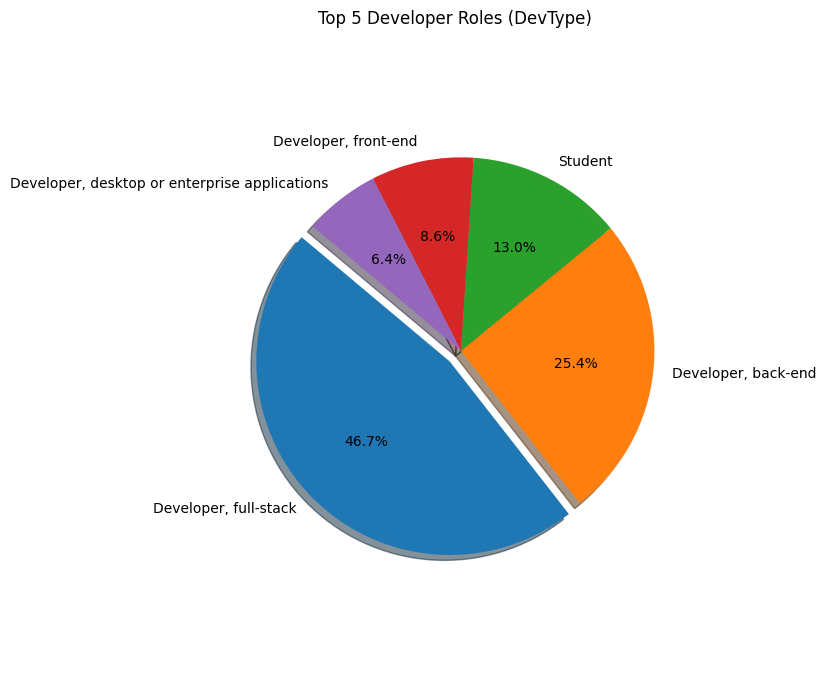

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Name: count, dtype: int64


In [12]:
top5_dev = top5_multiselect(df["DevType"])
pie_top5(top5_dev, "Top 5 Developer Roles (DevType)")


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



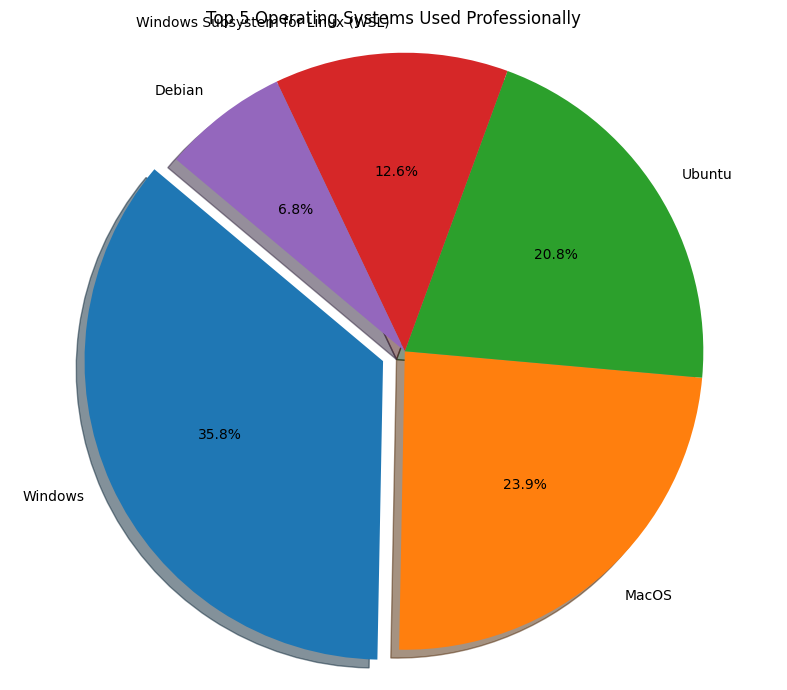

OpSysProfessional use
Windows                              27918
MacOS                                18625
Ubuntu                               16237
Windows Subsystem for Linux (WSL)     9859
Debian                                5327
Name: count, dtype: int64


In [13]:
col = "OpSysProfessional use"   # exact column name with a space
top5_os = top5_multiselect(df[col])
pie_top5(top5_os, "Top 5 Operating Systems Used Professionally")


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



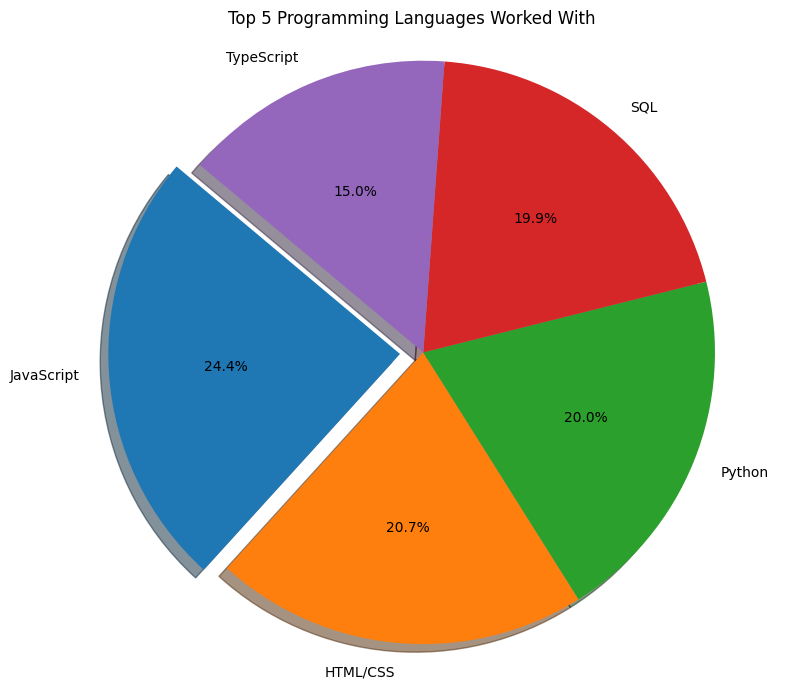

LanguageHaveWorkedWith
JavaScript    37492
HTML/CSS      31816
Python        30719
SQL           30682
TypeScript    23150
Name: count, dtype: int64


In [14]:
top5_lang = top5_multiselect(df["LanguageHaveWorkedWith"])
pie_top5(top5_lang, "Top 5 Programming Languages Worked With")


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



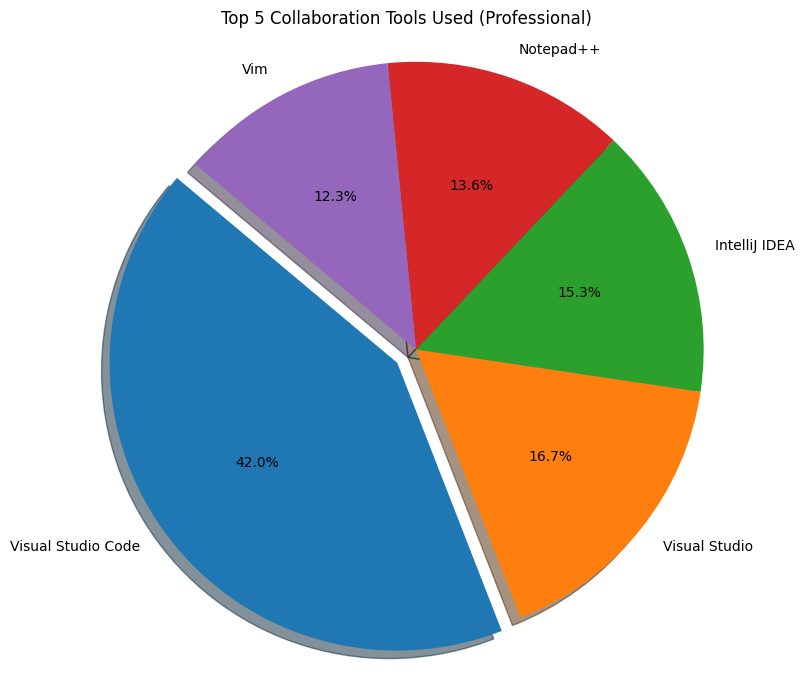

NEWCollabToolsHaveWorkedWith
Visual Studio Code    42751
Visual Studio         17021
IntelliJ IDEA         15555
Notepad++             13874
Vim                   12523
Name: count, dtype: int64


In [15]:
top5_tools = top5_multiselect(df["NEWCollabToolsHaveWorkedWith"])
pie_top5(top5_tools, "Top 5 Collaboration Tools Used (Professional)")


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



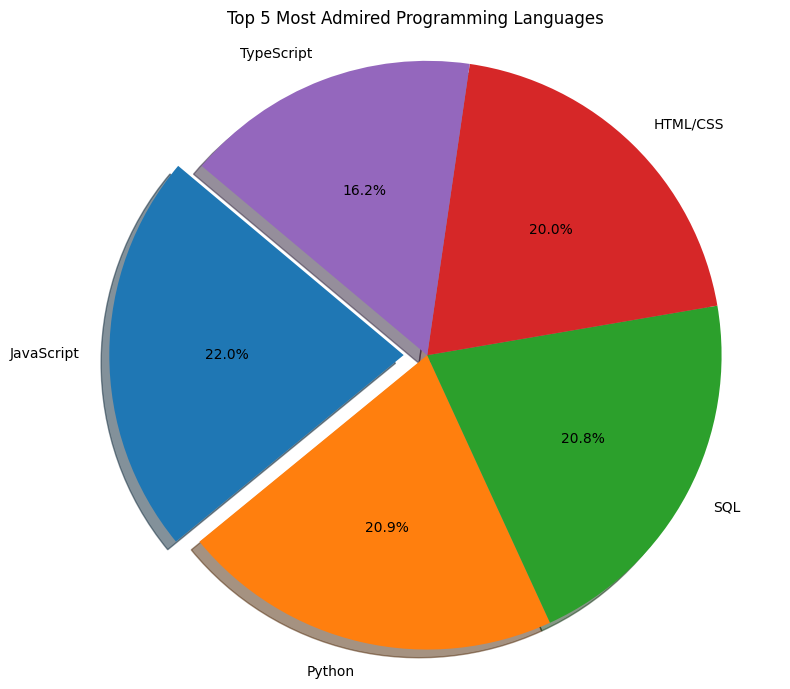

LanguageAdmired
JavaScript    21869
Python        20774
SQL           20692
HTML/CSS      19851
TypeScript    16079
Name: count, dtype: int64


In [16]:
top5_admired = top5_multiselect(df["LanguageAdmired"])
pie_top5(top5_admired, "Top 5 Most Admired Programming Languages")


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



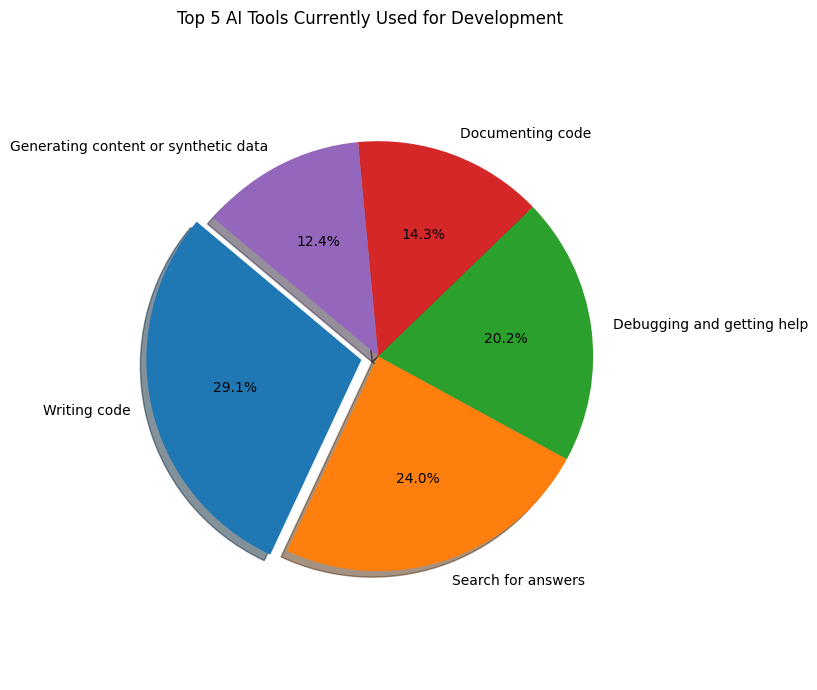

AIToolCurrently Using
Writing code                            29486
Search for answers                      24295
Debugging and getting help              20404
Documenting code                        14439
Generating content or synthetic data    12538
Name: count, dtype: int64


In [17]:
col = "AIToolCurrently Using"   # exact column name with a space
top5_ai = top5_multiselect(df[col])
pie_top5(top5_ai, "Top 5 AI Tools Currently Used for Development")


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



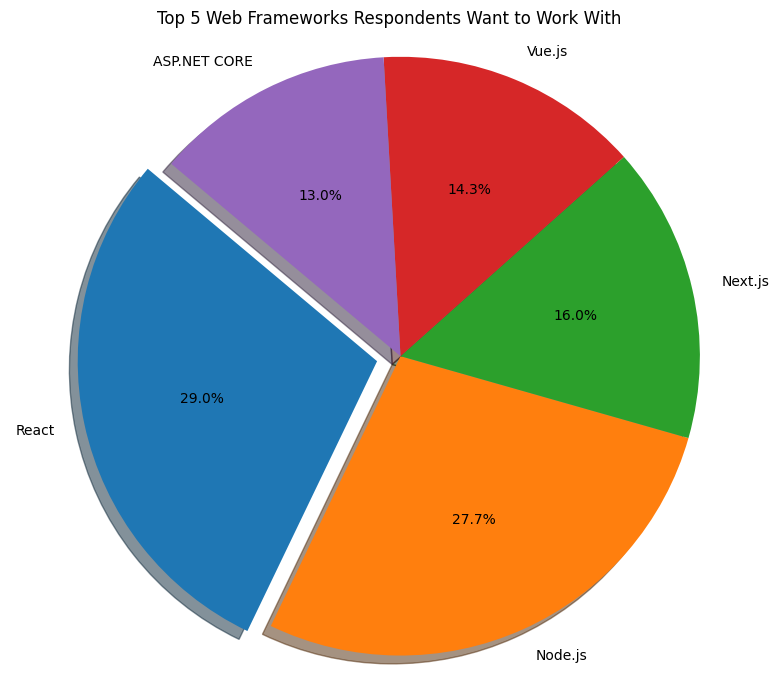

WebframeWantToWorkWith
React           15404
Node.js         14735
Next.js          8507
Vue.js           7604
ASP.NET CORE     6905
Name: count, dtype: int64


In [18]:
top5_web = top5_multiselect(df["WebframeWantToWorkWith"])
pie_top5(top5_web, "Top 5 Web Frameworks Respondents Want to Work With")


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



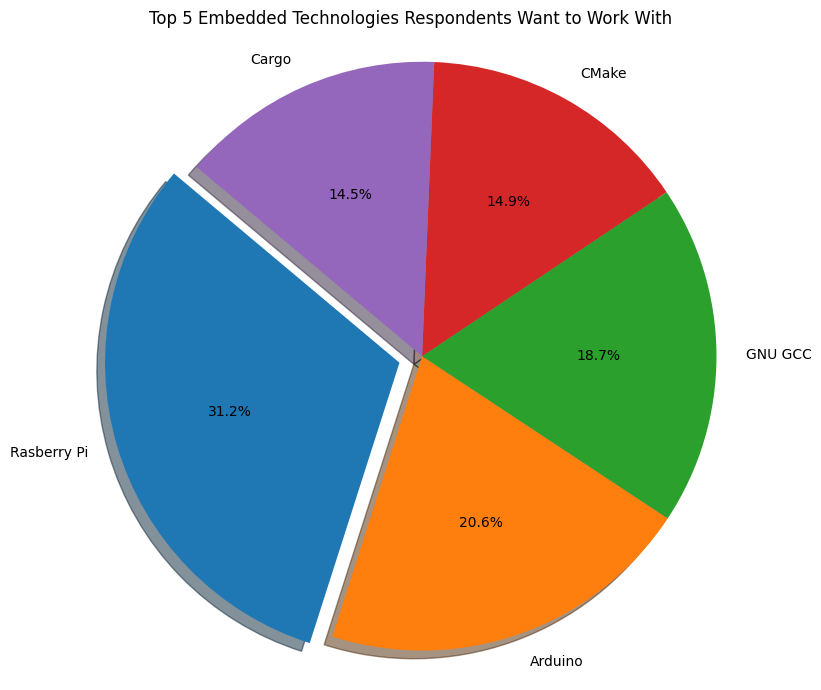

EmbeddedWantToWorkWith
Rasberry Pi    9792
Arduino        6482
GNU GCC        5870
CMake          4693
Cargo          4567
Name: count, dtype: int64


In [19]:
top5_embedded = top5_multiselect(df["EmbeddedWantToWorkWith"])
pie_top5(top5_embedded, "Top 5 Embedded Technologies Respondents Want to Work With")


### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
